In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def image_negation(image):
    negated_image = 255 - image
    return negated_image

In [3]:
def log_transform(image, c=1):
    log_transformed_image = c * np.log1p(image)
    return np.clip(log_transformed_image, 0, 255).astype(np.uint8)

In [4]:
def power_law_transform(image, gamma=1, c=1):
    power_law_transformed_image = c * np.power(image, gamma)
    return np.clip(power_law_transformed_image, 0, 255).astype(np.uint8)

In [5]:
def gamma_correction(image, gamma=1):
    gamma_corrected_image = np.power(image / 255.0, gamma) * 255
    return np.clip(gamma_corrected_image, 0, 255).astype(np.uint8)

In [6]:
def piecewise_linear_transform(image, breakpoints, slopes):
    piecewise_image = np.piecewise(image, [image < breakpoints[0], (image >= breakpoints[0]) & (image < breakpoints[1]), image >= breakpoints[1]],
                                    [lambda x: slopes[0] * x, lambda x: slopes[1] * x + slopes[0] * breakpoints[0], lambda x: slopes[2] * x + slopes[1] * breakpoints[1]])
    return np.clip(piecewise_image, 0, 255).astype(np.uint8)

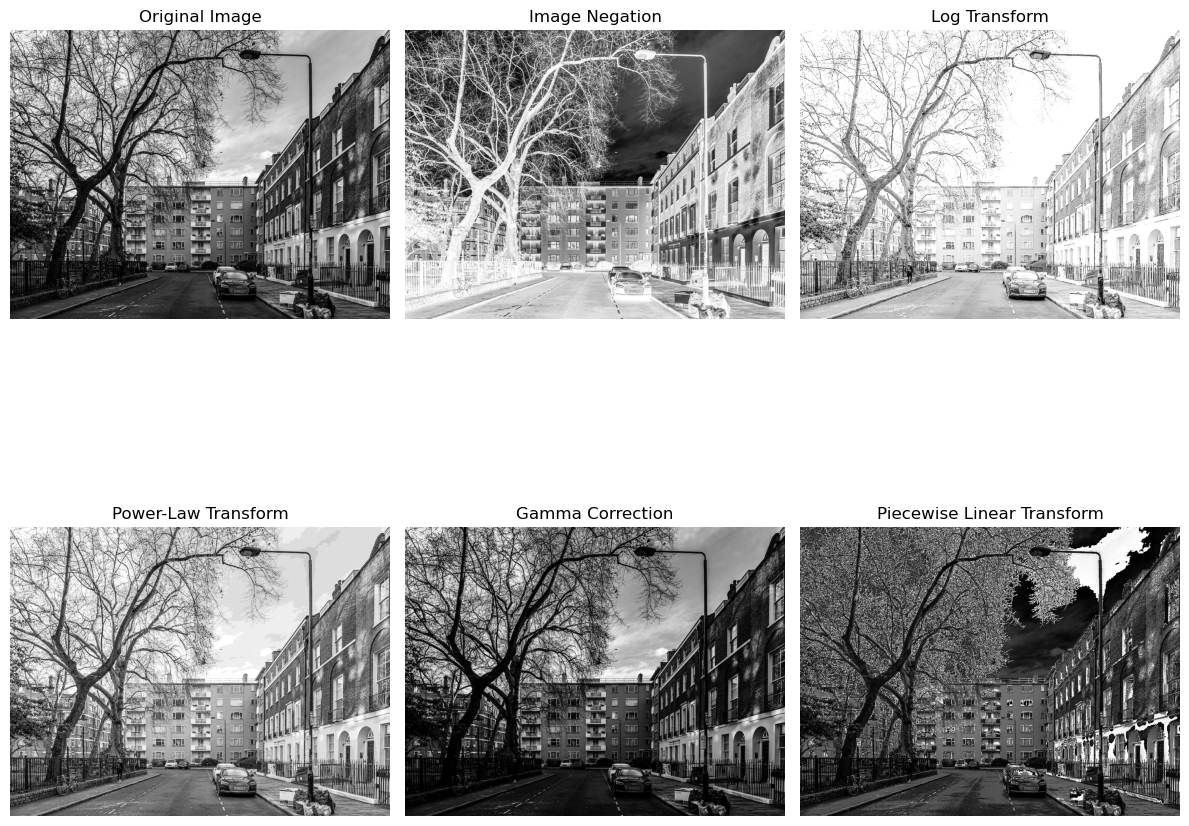

In [7]:
# Load the image
image_path = 'City.jpg'
image = np.array(Image.open(image_path).convert('L'))

# Apply image transformations
negated_image = image_negation(image)
log_transformed_image = log_transform(image, c=50)
power_law_transformed_image = power_law_transform(image, gamma=0.5, c=1)
gamma_corrected_image = gamma_correction(image, gamma=1.5)
piecewise_transformed_image = piecewise_linear_transform(image, [50, 150], [1, 0.5, 1])

# Plot the original and transformed images
plt.figure(figsize=(12, 12))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(negated_image, cmap='gray')
plt.title('Image Negation')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(log_transformed_image, cmap='gray')
plt.title('Log Transform')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(power_law_transformed_image, cmap='gray')
plt.title('Power-Law Transform')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title('Gamma Correction')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(piecewise_transformed_image, cmap='gray')
plt.title('Piecewise Linear Transform')
plt.axis('off')

plt.tight_layout()
plt.show()